
# What is the Gradient?

Imagine you are standing on a hilly landscape (a function $f(x, y, z)$). The gradient, denoted by $\nabla f$ (read as "del $f$" or "nabla $f$"), is a **vector** that tells you two things at any given point:

1.  **Direction:** The direction in which the function $f$ increases most rapidly (the steepest slope). ⛰️
2.  **Magnitude:** The rate of that maximum increase (how steep the slope actually is). 📈

In simple terms, if you follow the gradient vector, you are taking the fastest path to higher values of the function.

---

# The Formula 📝

The gradient is calculated using the **partial derivatives** of the function. A partial derivative is just the regular derivative, but you treat all other variables as constants.

For a function of three variables, $f(x, y, z)$, the gradient is defined as:

$$
\nabla f = \left\langle \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right\rangle
$$

This can also be written using the standard basis vectors ($\mathbf{i}, \mathbf{j}, \mathbf{k}$):

$$
\nabla f = \frac{\partial f}{\partial x} \mathbf{i} + \frac{\partial f}{\partial y} \mathbf{j} + \frac{\partial f}{\partial z} \mathbf{k}
$$

### The Nabla Operator ($\nabla$)

The symbol $\nabla$ is called the **nabla operator** (or "del operator"). It's a vector of partial derivative operators:

$$
\nabla = \left\langle \frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z} \right\rangle
$$

When you apply this operator to a scalar function $f$, you get the gradient vector $\nabla f$.



## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

## Functions

In [2]:
def plot_function(X, Y, fn, linewidth=0):
    X, Y = np.meshgrid(X, Y)
    Z = fn(X, Y)
    
    # Create figure.
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    

## Plot Original Function

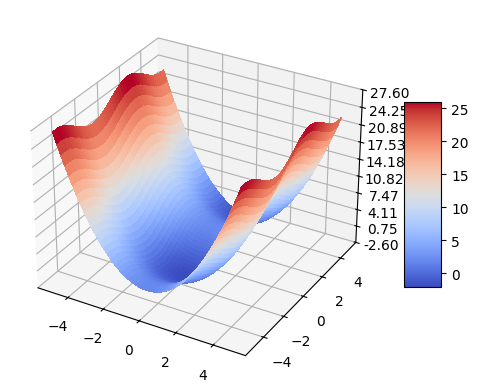

In [3]:
X = np.arange(-5, 5, 0.025)
Y = np.arange(-5, 5, 0.025)
f = lambda x, y : x**2 + 2 * np.sin(y)

plot_function(X, Y, f)

## Plot Gradient of Function

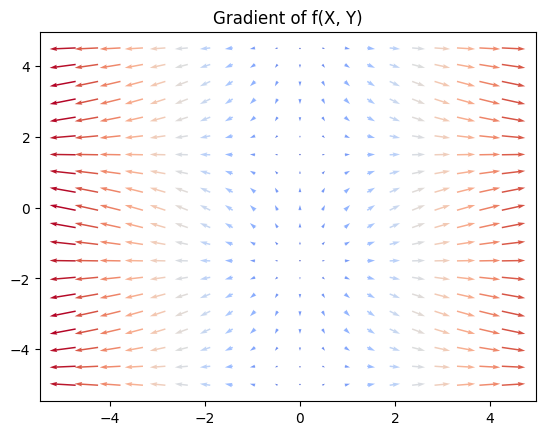

In [4]:
Xm, Ym = np.meshgrid(X, Y)
df = lambda x, y : (2 * x, 2 * np.cos(y))
U, V = df(Xm, Ym)

plt.figure()
plt.title('Gradient of f(X, Y)')
Clr = np.hypot(U, V)
d = 20
Q = plt.quiver(Xm[::d, ::d], Ym[::d, ::d], U[::d, ::d], V[::d, ::d],
               Clr[::d, ::d], pivot='mid', cmap=cm.coolwarm)

The directional derivative is closely related to the gradient! 🧭 While the gradient tells you the direction of the *maximum* rate of change, the directional derivative tells you the rate of change of a function $f$ at a point $(x_0, y_0, z_0)$ **in any arbitrary direction** you choose.

---

# What is the Directional Derivative?

Imagine you are still on that hilly landscape (function $f$). Instead of finding the steepest path, you decide to walk in a specific direction (like due North-East). The directional derivative, denoted by $D_{\mathbf{u}} f$, measures how steep the hill is *only* along that chosen path. 🚶

It is the rate of change of the function $f$ with respect to distance along a specific unit vector $\mathbf{u}$.

---

# The Formula 📐

The directional derivative of a function $f$ in the direction of a **unit vector** $\mathbf{u}$ is calculated by taking the **dot product** of the gradient of $f$ and the unit vector $\mathbf{u}$.

$$
D_{\mathbf{u}} f(x, y, z) = \nabla f(x, y, z) \cdot \mathbf{u}
$$

### Key Components:

1.  **Gradient ($\nabla f$):** This is the vector we just discussed, containing all the partial derivatives. It tells you all the possible rates of change.
    $$
    \nabla f = \left\langle \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right\rangle
    $$

2.  **Unit Vector ($\mathbf{u}$):** This is the vector that specifies the direction of interest. It *must* have a magnitude (length) of 1. If you are given a non-unit vector $\mathbf{v}$, you must first normalize it to find $\mathbf{u}$:
    $$
    \mathbf{u} = \frac{\mathbf{v}}{\|\mathbf{v}\|}
    $$

### The Calculation

Substituting the definition of the gradient into the formula, and assuming $\mathbf{u} = \langle u_1, u_2, u_3 \rangle$, the directional derivative is:

$$
D_{\mathbf{u}} f = \frac{\partial f}{\partial x} u_1 + \frac{\partial f}{\partial y} u_2 + \frac{\partial f}{\partial z} u_3
$$

The result of the directional derivative is a **scalar** (a single number), which represents the slope of the function in that specific direction. 🔢

## Calculate Directional Gradient

In [5]:
x_i = [1, 0]
y_i = [0, 1]

# gradient should be almost entirely in x-direction
xo = [4, 0]
df = lambda x, y : (2 * x, np.cos(y))
go = df(xo[0], xo[1])
print('Gradient at f({}) along vector x_i = {}'.format(xo, np.dot(go, x_i)))
print('Gradient at f({}) along vector y_i = {}'.format(xo, np.dot(go, y_i)))

Gradient at f([4, 0]) along vector x_i = 8.0
Gradient at f([4, 0]) along vector y_i = 1.0
